In [1]:
from env import get_db_url
import numpy as np
import pandas as pd
import os
import acquire
import prepare
import wrangle
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import explore

from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

### Load your zillow dataset.

In [2]:
train, validate, test = prepare.split_data(wrangle.wrangle_zillow())

In [3]:
train.shape, validate.shape, test.shape

((1278128, 7), (426043, 7), (426043, 7))

In [4]:
train

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
1844941,3.0,2.0,1520.0,420429.0,1921.0,5174.91,6037.0
824995,5.0,3.0,2935.0,391054.0,1954.0,3399.33,6037.0
1214129,4.0,4.0,3394.0,1199447.0,1958.0,13254.74,6059.0
1566096,2.0,2.0,1048.0,187230.0,1925.0,3364.40,6037.0
1259406,4.0,3.0,2843.0,193625.0,2005.0,3340.72,6037.0
...,...,...,...,...,...,...,...
2036394,3.0,3.0,2162.0,230635.0,1958.0,2928.20,6037.0
551645,5.0,3.0,3054.0,324446.0,1996.0,4652.65,6037.0
1883454,4.0,2.5,2688.0,979673.0,2000.0,10920.26,6059.0
1292898,5.0,3.0,4354.0,663628.0,1997.0,7292.88,6111.0


### Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [5]:
from sklearn.linear_model import LinearRegression

### Here is some sample code to get you started:


##### from sklearn.linear_model import LinearRegression

### assuming X and y are already defined
##### model = LinearRegression().fit(X, y)
##### predictions = model.predict(X)
##### Modify and add to the code above as necessary for it to work with the zillow dataset.

In [6]:
X = train.sqft
y = train.tax_value
X = pd.DataFrame(X)

In [16]:
model = LinearRegression().fit(X,y)
model

LinearRegression()

In [30]:
predictions = model.predict(X)
predictions

array([ 377737.88909607,  719840.69175942,  830812.55495551, ...,
        660123.80677154, 1062910.56948329,  445191.37456821])

### Plot the residuals for the linear regression model that you made.

In [41]:
results = train[['sqft', 'tax_value']]
results

,sqft,tax_value
1844941,1520.0,420429.0
824995,2935.0,391054.0
1214129,3394.0,1199447.0
1566096,1048.0,187230.0
1259406,2843.0,193625.0
...,...,...
2036394,2162.0,230635.0
551645,3054.0,324446.0
1883454,2688.0,979673.0
1292898,4354.0,663628.0


In [42]:
results['predictions'] = predictions.tolist()
results

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1460/53519491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['predictions'] = predictions.tolist()


,sqft,tax_value,predictions
1844941,1520.0,420429.0,3.777379e+05
824995,2935.0,391054.0,7.198407e+05
1214129,3394.0,1199447.0,8.308126e+05
1566096,1048.0,187230.0,2.636230e+05
1259406,2843.0,193625.0,6.975980e+05
...,...,...,...
2036394,2162.0,230635.0,5.329534e+05
551645,3054.0,324446.0,7.486112e+05
1883454,2688.0,979673.0,6.601238e+05
1292898,4354.0,663628.0,1.062911e+06


### Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [43]:
results['yhat_baseline'] = results.tax_value - results.tax_value.mean()
results['yhat_predictions'] = results.tax_value - results.predictions

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1460/1365837609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['yhat_baseline'] = results.tax_value - results.tax_value.mean()
/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1460/1365837609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['yhat_predictions'] = results.tax_value - results.predictions


In [57]:
results['tax_value_mean'] = results.tax_value.mean()

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1460/3442539286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['tax_value_mean'] = results.tax_value.mean()


In [58]:
results

,sqft,tax_value,predictions,yhat_baseline,yhat_predictions,tax_value_mean
1844941,1520.0,420429.0,3.777379e+05,-40574.061417,42691.110904,461003.061417
824995,2935.0,391054.0,7.198407e+05,-69949.061417,-328786.691759,461003.061417
1214129,3394.0,1199447.0,8.308126e+05,738443.938583,368634.445044,461003.061417
1566096,1048.0,187230.0,2.636230e+05,-273773.061417,-76393.031953,461003.061417
1259406,2843.0,193625.0,6.975980e+05,-267378.061417,-503972.965367,461003.061417
...,...,...,...,...,...,...
2036394,2162.0,230635.0,5.329534e+05,-230368.061417,-302318.436312,461003.061417
551645,3054.0,324446.0,7.486112e+05,-136557.061417,-424165.174810,461003.061417
1883454,2688.0,979673.0,6.601238e+05,518669.938583,319549.193228,461003.061417
1292898,4354.0,663628.0,1.062911e+06,202624.938583,-399282.569483,461003.061417


### Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [59]:
MSE2_baseline = mean_squared_error(results.tax_value, results.tax_value_mean)
SSE2_baseline = MSE2_baseline * len(results)
RMSE2_baseline = sqrt(MSE2_baseline)

MSE2_baseline, SSE2_baseline, RMSE2_baseline

(449474804104.8629, 5.744863324209402e+17, 670428.8210577338)

### Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [60]:
MSE2 = mean_squared_error(results.tax_value, results.yhat_predictions)
SSE2 = MSE2 * len(results)
RMSE2 = sqrt(MSE2)

MSE2, SSE2, RMSE2

(308716281137.0448, 3.9457892297712877e+17, 555622.426776534)

### What is the amount of variance explained in your model?

In [61]:
TSS = SSE2_baseline
ESS = TSS - SSE2
R2 = ESS / TSS

In [62]:
R2

0.3131622099444289

In [75]:
results

,sqft,tax_value,predictions,yhat_baseline,yhat_predictions,tax_value_mean
1844941,1520.0,420429.0,3.777379e+05,-40574.061417,42691.110904,461003.061417
824995,2935.0,391054.0,7.198407e+05,-69949.061417,-328786.691759,461003.061417
1214129,3394.0,1199447.0,8.308126e+05,738443.938583,368634.445044,461003.061417
1566096,1048.0,187230.0,2.636230e+05,-273773.061417,-76393.031953,461003.061417
1259406,2843.0,193625.0,6.975980e+05,-267378.061417,-503972.965367,461003.061417
...,...,...,...,...,...,...
2036394,2162.0,230635.0,5.329534e+05,-230368.061417,-302318.436312,461003.061417
551645,3054.0,324446.0,7.486112e+05,-136557.061417,-424165.174810,461003.061417
1883454,2688.0,979673.0,6.601238e+05,518669.938583,319549.193228,461003.061417
1292898,4354.0,663628.0,1.062911e+06,202624.938583,-399282.569483,461003.061417


### Is your model better than the baseline model?

YES

### Create a file named evaluate.py that contains the following functions.

##### plot_residuals(y, yhat): creates a residual plot
##### regression_errors(y, yhat): returns the following values:
##### sum of squared errors (SSE)
##### explained sum of squares (ESS)
##### total sum of squares (TSS)
##### mean squared error (MSE)
##### root mean squared error (RMSE)
##### baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
##### better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

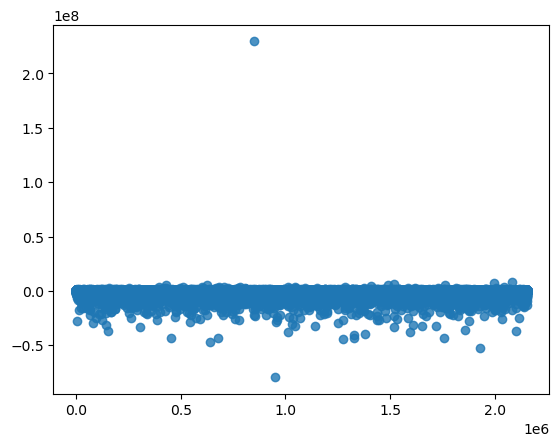

In [90]:


def plot_residuals(y, yhat):
    
        results_sample = results.sample(n=10000, random_state=823)
        sns.regplot(data=results.reset_index(), x=results.index, y=yhat - y)

plot_residuals(results.tax_value, results.predictions)




In [94]:
def regression_errors(y, yhat):
    MSE = mean_squared_error(y, yhat)
    SSE = MSE2 * len(y)
    RMSE = sqrt(mean_squared_error(y, yhat))
    TSS = sum((y - y.mean())**2)
    ESS = TSS - SSE
    
    return MSE, SSE, RMSE, TSS, ESS

In [95]:
regression_errors(results.tax_value, results.predictions)

(353282345603.8177,
 3.9457892297712877e+17,
 594375.5930418221,
 5.7448633242095514e+17,
 1.7990740944382637e+17)

In [99]:
def baseline_mean_errors(y):
    SSE = sum((y - y.mean())**2)
    MSE = SSE / len(y)
    RMSE = sqrt(MSE)
    return SSE, MSE, RMSE

baseline_mean_errors(results.tax_value)

(5.7448633242095514e+17, 449474804104.8746, 670428.8210577426)

In [100]:
def better_than_baseline(y, yhat):
    if mean_squared_error(y, yhat) < sum((y - y.mean())**2):
        return True
    else:
        return False

In [101]:
better_than_baseline(results.tax_value, results.predictions)

True